## Lab 11 - Polat, Mahad,  Mueeza 

##### Using Manual calculation and Python code to find the Communities by Girvan-Newman Algorithm for the graph shown below ( 7 marks manual calculation + 4 marks Python implementation = 11 marks)


The communities are as follows:
[['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]


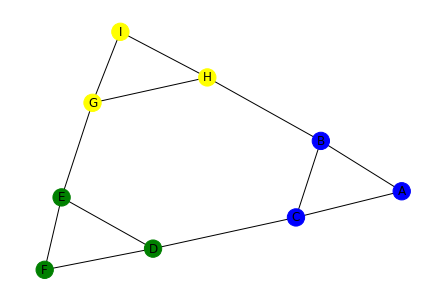

In [30]:
from networkx.algorithms.community.centrality import girvan_newman
import community.community_louvain as community_louvain
from networkx.algorithms.community import greedy_modularity_communities
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'H'), ('C', 'D'), ('H', 'I'), ('H', 'G'), ('D', 'E'), ('D', 'F'), ('I', 'G'), ('G', 'E'), ('E', 'F')])

k = 2
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    partition = [sorted(c) for c in communities]

partition

#Visulaization 
# Note Refrence for visualization code is: 
# https://networkx.guide/algorithms/community-detection/girvan-newman/


color_map = []
for node in G:
    if node in partition[0]:
        color_map.append('blue')
    elif node in partition[1]:
        color_map.append('green')
    else:
        color_map.append('yellow') 



print("The communities are as follows:")
print(partition)

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

The communities are as follows:
{'A': 0, 'B': 0, 'C': 0, 'D': 1, 'E': 1, 'F': 1, 'G': 2, 'H': 2, 'I': 2}
[['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']]


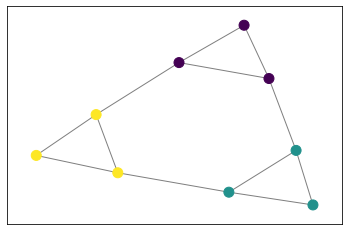

In [31]:
partition = community_louvain.best_partition(G)
names = set(partition.values())
l = [] 
for n in names:
    l.append([k for k in partition.keys() if partition[k] == n])

print("The communities are as follows:")
print(partition)

print(l)

pos = nx.spring_layout(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

The communities are as follows:
[['B', 'A', 'C'], ['E', 'F', 'D'], ['I', 'G', 'H']]


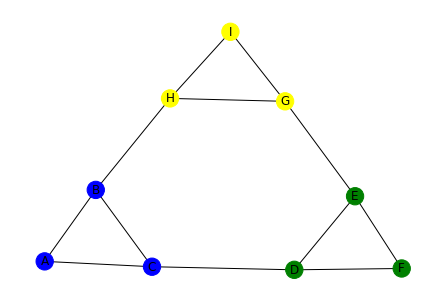

In [32]:
partition = greedy_modularity_communities(G)


#Visulaization 
# Note Refrence for visualization code is: 
# https://networkx.guide/algorithms/community-detection/girvan-newman/

color_map = []
for node in G:
    if node in partition[0]:
        color_map.append('blue')
    elif node in partition[1]:
        color_map.append('green')
    else:
        color_map.append('yellow') 

l = []
for x in partition:
    l.append(list(x))


print("The communities are as follows:")
print(l)
# print(partition)

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()
